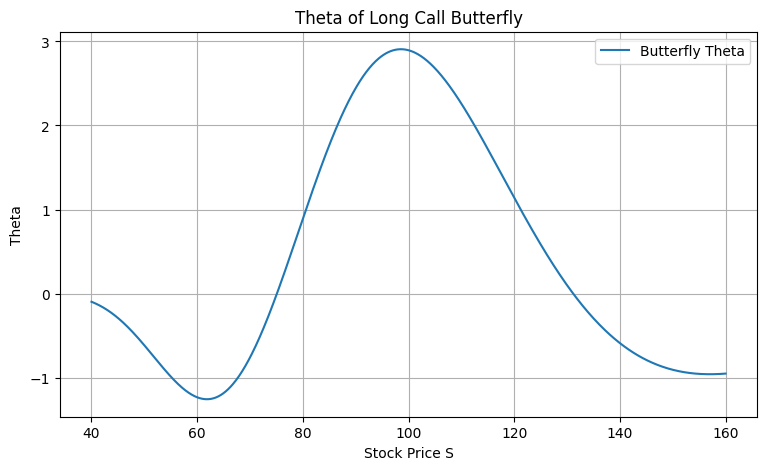

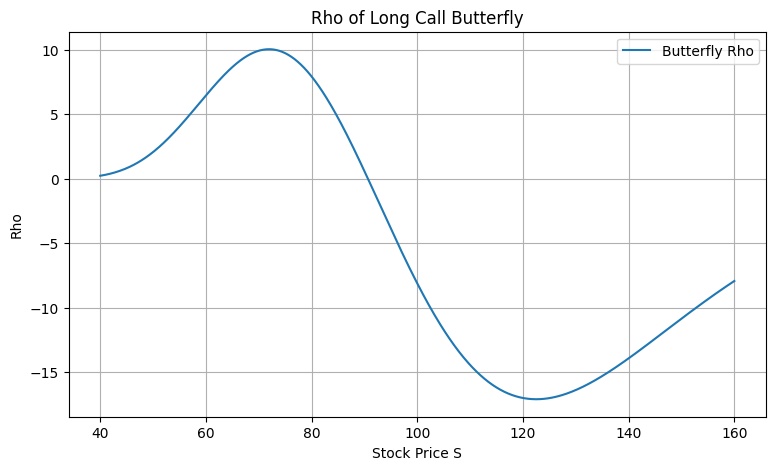

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- Black-Scholes tools ---
def d1_d2(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return d1, d2

def call_theta(S, K, T, r, sigma):
    d1, d2 = d1_d2(S, K, T, r, sigma)
    term1 = -S * norm.pdf(d1) * sigma / (2*np.sqrt(T))
    term2 = -r * K * np.exp(-r*T) * norm.cdf(d2)
    return term1 + term2

def call_rho(S, K, T, r, sigma):
    d1, d2 = d1_d2(S, K, T, r, sigma)
    return K * T * np.exp(-r*T) * norm.cdf(d2)

# --- Butterfly parameters ---
K1 = 80
K2 = 100
K3 = 120

T = 1.0
r = 0.05
sigma = 0.25

S_vals = np.linspace(40, 160, 800)

# --- Compute butterfly theta and rho ---
theta_vals = []
rho_vals   = []

for S in S_vals:
    theta_fly = (call_theta(S, K1, T, r, sigma)
                 - 2*call_theta(S, K2, T, r, sigma)
                 + call_theta(S, K3, T, r, sigma))

    rho_fly   = (call_rho(S, K1, T, r, sigma)
                 - 2*call_rho(S, K2, T, r, sigma)
                 + call_rho(S, K3, T, r, sigma))

    theta_vals.append(theta_fly)
    rho_vals.append(rho_fly)

# --- Plot Theta ---
plt.figure(figsize=(9,5))
plt.plot(S_vals, theta_vals, label="Butterfly Theta")
plt.title("Theta of Long Call Butterfly")
plt.xlabel("Stock Price S")
plt.ylabel("Theta")
plt.grid(True)
plt.legend()
plt.show()

# --- Plot Rho ---
plt.figure(figsize=(9,5))
plt.plot(S_vals, rho_vals, label="Butterfly Rho")
plt.title("Rho of Long Call Butterfly")
plt.xlabel("Stock Price S")
plt.ylabel("Rho")
plt.grid(True)
plt.legend()
plt.show()
